In [1]:
%pylab inline 
#%matplotlib qt
#from __future__ import division # use so 1/2 = 0.5, etc.
import sk_dsp_comm.sigsys as ss
import scipy.signal as signal
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [2]:
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing

# Continuous Time Signals

## Sinusoidal signals

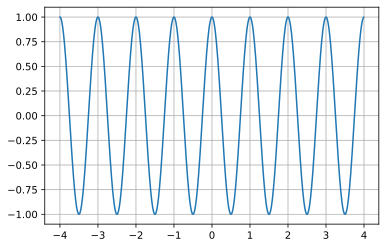

In [3]:
t = arange(-4,4,.01)
x = cos(2*pi*t)
plot(t,x)

grid()

## Rectangle and Triangle pulse

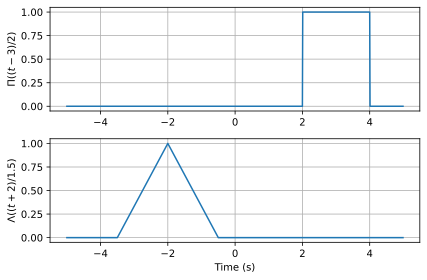

In [4]:
t = arange(-5,5,.01)
x_rect = ss.rect(t-3,2)
x_tri = ss.tri(t+2,1.5)
subplot(211)
plot(t,x_rect)
grid()
ylabel(r'$\Pi((t-3)/2)$');
subplot(212)
plot(t,x_tri)
grid()
xlabel(r'Time (s)')
ylabel(r'$\Lambda((t+2)/1.5)$');
tight_layout()

Interactive version

In [5]:
# Make an interactive version of the above
from ipywidgets import interact, interactive

def pulses_plot(D1,D2,W1,W2):
    t = arange(-5,5,.01)
    x_rect = ss.rect(t-D1,W1)
    x_tri = ss.tri(t-D2,W2)
    subplot(211)
    plot(t,x_rect)
    grid()
    ylabel(r'$\Pi((t-3)/2)$');
    subplot(212)
    plot(t,x_tri)
    grid()
    xlabel(r'Time (s)')
    ylabel(r'$\Lambda((t+2)/1.5)$');
    tight_layout()

interactive_plot = interactive(pulses_plot,D1 = (-3,3,.5), D2 = (-3,3,.5), W1 = (0.5,2,.25), W2 = (0.5,2,.25));
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='D1', max=3.0, min=-3.0, step=0.5), FloatSlider(value…

## More examples

- $ x_1(t) = \sin(2\pi\cdot 5t) \Pi((t-2)/2)$ for $0\leq t \leq 10 $
- $ x_2(t) = \displaystyle \sum_{n=-\infty}^\infty  \Pi((t-5n)/1)$ for $-10 \leq t \leq 10$

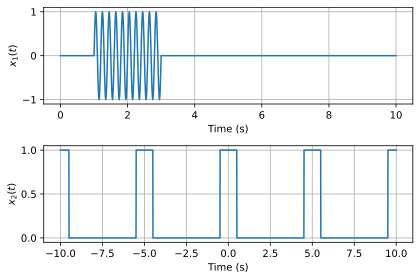

In [6]:
t1 = arange(0,10+.01,.01) # arange stops one step size less than the upper limit
x1 = sin(2*pi*5*t1)* ss.rect(t1-2,2)
subplot(211)
plot(t1,x1)
xlabel(r'Time (s)')
ylabel(r'$x_1(t)$')
grid()
t2 = arange(-10,10,.01)
# Tweak mod() to take on negative values
x2 = ss.rect(mod(t2+2.5,5)-2.5,1)
subplot(212)
plot(t2,x2)
xlabel(r'Time (s)')
ylabel(r'$x_2(t)$')
grid()
tight_layout()

## Piecewise examples

\begin{align} x_3(t) = 
\begin{cases} 
1 + t^2, & 0\leq t \leq 3 \\ 
\cos(2\pi\cdot5\cdot t) & 3 < t \leq 5 \\ 
0, & \text{otherwise} 
\end{cases} 
\end{align}
for $-2\leq t \leq 6$.


In [7]:
def x3_func(t):
    """
    Create a piecewise function for plotting x3
    """
    x3 = zeros_like(t)
    for k,tk in enumerate(t):
        if tk >= 0 and tk <= 3:
            x3[k] = 1 + tk**2
        elif tk > 3 and tk <= 5:
            x3[k] = cos(2*pi*5*tk)
    return x3

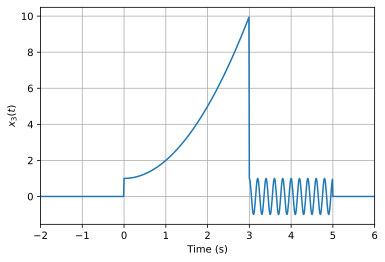

In [8]:
t3 = arange(-2,6+.01,.01)
x3 = x3_func(t3)
plot(t3,x3)
xlabel(r'Time (s)')
ylabel(r'$x_3(t)$')
xlim([-2,6])
grid()

# Discrete Time Signals

In [9]:
import matplotlib.pyplot as plt
import numpy as np

## Discrete Step 

- $ x_1 [n] = u[n] $ 
- $ x_2 [n] = u[n-5] $ 

In [10]:
# create discrete time axis
n = arange(-5, 17)

# create discrete time signals using sigsys module 'dstep'
x1 = ss.dstep(n)    # create DTS step function turns on at n = 0
x2 = ss.dstep(n-5)  # create DTS step function turns on at n = 5

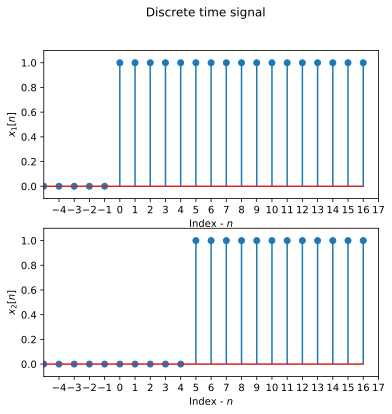

In [11]:
# First, create figure environment for the plot
fig, ax = subplots(2,figsize=(6,6))
fig.suptitle('Discrete time signal')
# Plot the signal using stem function
ax[0].stem(n, x1, use_line_collection=True)
# Add some additional features to the figure such as grid, label, etc
# ax[0].grid()                       # add gridt
ax[0].axis([ -5, 16, -0.1, 1.1])  # define the x and y axis of the plo
ax[0].set_xticks(n+1)

# second DTS
ax[1].stem(n, x2, use_line_collection=True)
# ax[1].grid()                       # add grid
ax[1].axis([ -5, 16, -0.1, 1.1])  # define the x and y axis of the plot
ax[1].set_xticks(n+1)

i = 1
for axs in ax.flat:
    axs.set(xlabel=r'Index - $n$', ylabel=r'$x_{idx:d}[n]$'.format(idx=i))
    i=i+1
    
    

## Discrete Impulse

$$
x[n] = \delta[n]
$$

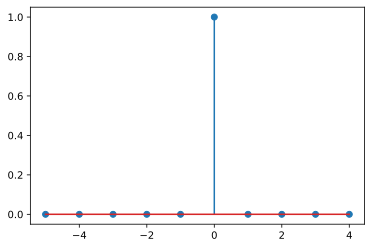

In [12]:
n = np.arange(-5,5)
x = ss.dimpulse(n)
plt.stem(n,x, use_line_collection=True)
plt.show()

$$
x[n] = \delta[n+2]
$$

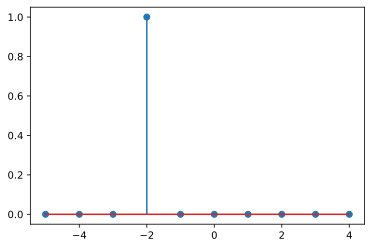

In [13]:
x = ss.dimpulse(n+2)
plt.stem(n,x, use_line_collection=True)
plt.show()

## Examples

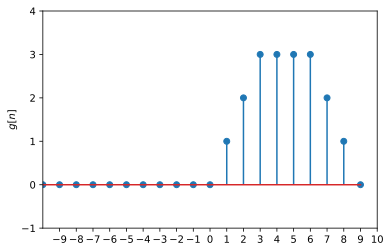

In [14]:
n = np.arange(-10,10)
g = ss.dimpulse(n-1) + 2*ss.dimpulse(n-2) + \
    3*(ss.dimpulse(n-3) + ss.dimpulse(n-4) + ss.dimpulse(n-5) + ss.dimpulse(n-6) ) + \
    2 * ss.dimpulse(n-7) + ss.dimpulse(n-8)

plt.stem(n, g, use_line_collection=True)
plt.axis([ -10, 10, -1, 4])
plt.ylabel(r'$g[n]$')
plt.xticks(n+1)
plt.show()

In [15]:
m = -n

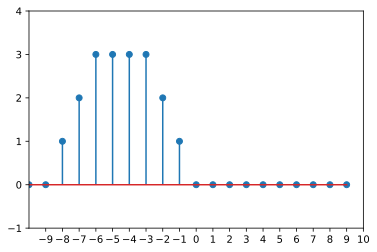

In [16]:
g = ss.dimpulse(m-1) + 2*ss.dimpulse(m-2) + \
    3*(ss.dimpulse(m-3) + ss.dimpulse(m-4) + ss.dimpulse(m-5) + ss.dimpulse(m-6) ) + \
    2 * ss.dimpulse(m-7) + ss.dimpulse(m-8)

plt.stem(n, g, use_line_collection=True)
plt.axis([ -10, 10, -1, 4])
plt.xticks(n+1)
plt.show()

In [17]:
m = n+2

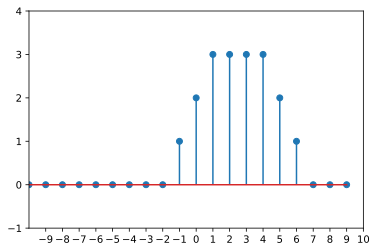

In [18]:
g = ss.dimpulse(m-1) + 2*ss.dimpulse(m-2) + \
    3*(ss.dimpulse(m-3) + ss.dimpulse(m-4) + ss.dimpulse(m-5) + ss.dimpulse(m-6) ) + \
    2 * ss.dimpulse(m-7) + ss.dimpulse(m-8)

plt.stem(n, g, use_line_collection=True)
plt.axis([ -10, 10, -1, 4])
plt.xticks(n+1)
plt.show()

In [19]:
m = 2 * n

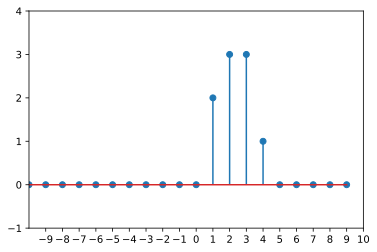

In [20]:
g = ss.dimpulse(m-1) + 2*ss.dimpulse(m-2) + \
    3*(ss.dimpulse(m-3) + ss.dimpulse(m-4) + ss.dimpulse(m-5) + ss.dimpulse(m-6) ) + \
    2 * ss.dimpulse(m-7) + ss.dimpulse(m-8)

plt.stem(n, g, use_line_collection=True)
plt.axis([ -10, 10, -1, 4])
plt.xticks(n+1)
plt.show()

## DT signals operations

\begin{align}
x_1 [n] & = \delta[n] + 2 \delta [n-1] + 3 \delta[n-2] + 2 \delta[n-3] \\
x_2 [n] & = \left\lbrace 1, 2, \underline{3}, 2, 1 \right\rbrace
\end{align}

In [21]:
n = np.arange(-5,5)
m = n


In [22]:
x1 = ss.dimpulse(m) + 2*ss.dimpulse(m-1) \
        + 3*ss.dimpulse(m-2) + 2*ss.dimpulse(m-3)
x2 = ss.dimpulse(m+2) + 2*ss.dimpulse(m+1) + 3*ss.dimpulse(m) \
        + 2*ss.dimpulse(m-1) + ss.dimpulse(m-2)

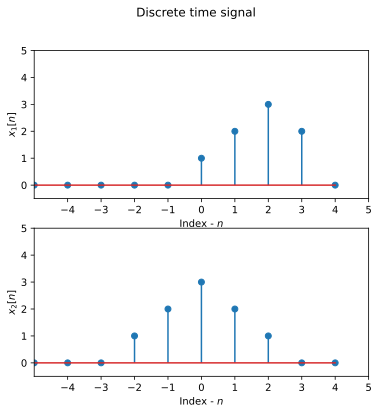

In [23]:
# First, create figure environment for the plot
fig, ax = subplots(2,figsize=(6,6))
fig.suptitle('Discrete time signal')
# Plot the signal using stem function
ax[0].stem(n, x1, use_line_collection=True)
# Add some additional features to the figure such as grid, label, etc
# ax[0].grid()                       # add gridt
ax[0].axis([ -5, 5, -0.5, 5])  # define the x and y axis of the plo
ax[0].set_xticks(n+1)

# second DTS
ax[1].stem(n, x2, use_line_collection=True)
# ax[1].grid()                       # add grid
ax[1].axis([ -5, 5, -0.5, 5])  # define the x and y axis of the plot
ax[1].set_xticks(n+1)

i = 1
for axs in ax.flat:
    axs.set(xlabel=r'Index - $n$', ylabel=r'$x_{idx:d}[n]$'.format(idx=i))
    i=i+1
    
    

In [24]:
# Modify each signal
m = 2*n
x1 = ss.dimpulse(m) + 2*ss.dimpulse(m-1) \
        + 3*ss.dimpulse(m-2) + 2*ss.dimpulse(m-3)


m = -n-1
x2 = ss.dimpulse(m+2) + 2*ss.dimpulse(m+1) + 3*ss.dimpulse(m) \
        + 2*ss.dimpulse(m-1) + ss.dimpulse(m-2)

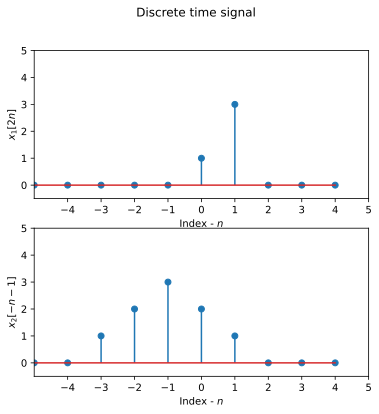

In [25]:
# First, create figure environment for the plot
fig, ax = subplots(2,figsize=(6,6))
fig.suptitle('Discrete time signal')
# Plot the signal using stem function
ax[0].stem(n, x1, use_line_collection=True)
# Add some additional features to the figure such as grid, label, etc
# ax[0].grid()                       # add gridt
ax[0].axis([ -5, 5, -0.5, 5])  # define the x and y axis of the plot
ax[0].set(ylabel=r'$x_{1}[2n]$')  
ax[0].set_xticks(n+1)

# second DTS
ax[1].stem(n, x2, use_line_collection=True)
# ax[1].grid()                       # add grid
ax[1].axis([ -5, 5, -0.5, 5])  # define the x and y axis of the plot
ax[1].set(ylabel=r'$x_{2}[-n-1]$') 
ax[1].set_xticks(n+1)

i = 1
for axs in ax.flat:
    axs.set(xlabel=r'Index - $n$')
    i=i+1
    

 

Combined signal

$$
x_3 [n] = x_1 [2n] + x_2 [-n-1]
$$

In [26]:
x3 = x1 + x2

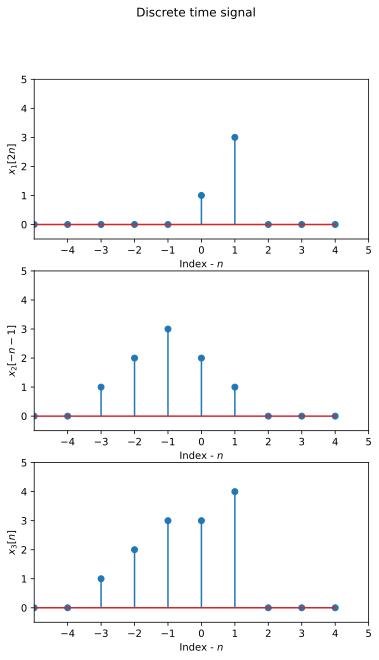

In [27]:
# First, create figure environment for the plot
fig, ax = subplots(3,figsize=(6,10))
fig.suptitle('Discrete time signal')
# Plot the signal using stem function
ax[0].stem(n, x1, use_line_collection=True)
# Add some additional features to the figure such as grid, label, etc
# ax[0].grid()                       # add gridt
ax[0].axis([ -5, 5, -0.5, 5])  # define the x and y axis of the plot
ax[0].set(ylabel=r'$x_{1}[2n]$')  
ax[0].set_xticks(n+1)

# second DTS
ax[1].stem(n, x2, use_line_collection=True)
# ax[1].grid()                       # add grid
ax[1].axis([ -5, 5, -0.5, 5])  # define the x and y axis of the plot
ax[1].set(ylabel=r'$x_{2}[-n-1]$') 
ax[1].set_xticks(n+1)

# Combined DTS
ax[2].stem(n, x3, use_line_collection=True)
ax[2].axis([ -5, 5, -0.5, 5])  # define the x and y axis of the plot
ax[2].set(ylabel=r'$ x_3[n]$') 
ax[2].set_xticks(n+1)


i = 1
for axs in ax.flat:
    axs.set(xlabel=r'Index - $n$')
    i=i+1
    

## Latest example (for next assignment)

$$
w[n] = (6-n) \left( u[n] - u[n-6] \right)
$$

In [28]:
# create discrete time axis
n = arange(-10, 10)

w = (6-n) * (ss.dstep(n) - ss.dstep(n-6))


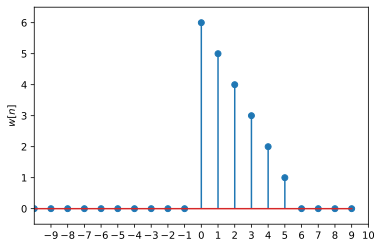

In [29]:
plt.stem(n, w, use_line_collection=True)
plt.axis([ -10, 10, -0.5, 6.5])
plt.ylabel(r'$w[n]$')
plt.xticks(n+1)
plt.show()

## Using user defined functions

In [30]:
def MyDTSPlot(n,x,limit,label):
    plt.stem(n, x, use_line_collection=True)
    plt.axis(limit)
    plt.ylabel(label)
    plt.xticks(n+1)
    plt.show()

In [31]:
def my_g(n):
    """
    Generate user defined function such as given in the previous example
    """
    x = np.zeros(len(n))
    x = ss.dimpulse(n-1) + 2*ss.dimpulse(n-2) \
        + 3 * (ss.dimpulse(n-3) + ss.dimpulse(n-4) + ss.dimpulse(n-5) + ss.dimpulse(n-6) )  \
        +  2 * ss.dimpulse(n-7) + ss.dimpulse(n-8)
    return x


In [47]:
n = np.arange(-10,10)
x_1 = my_g(n)

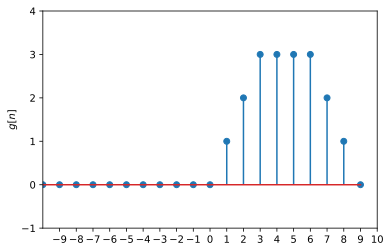

In [48]:
MyDTSPlot(n, x_1, [ -10, 10, -1, 4], '$g[n]$')

In [49]:
x_2 = my_g(-n)

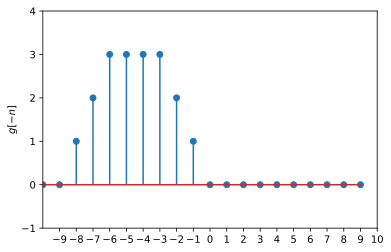

In [50]:
MyDTSPlot(n, x_2, [ -10, 10, -1, 4], '$g[-n]$')

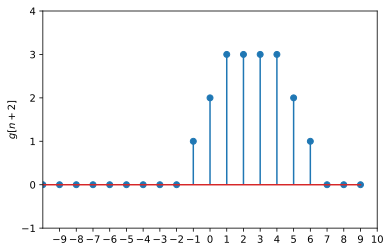

In [51]:
x_3 = my_g(n+2)
MyDTSPlot(n, x_3, [ -10, 10, -1, 4], '$g[n+2]$')

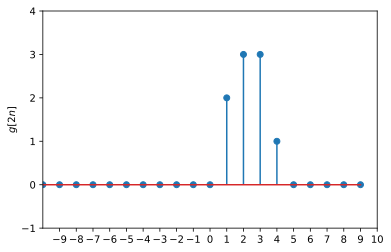

In [56]:
x_4 = my_g(2*(n))
MyDTSPlot(n, x_4, [ -10, 10, -1, 4], '$g[2n]$')

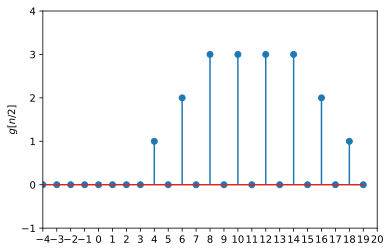

In [64]:
n = np.arange(-5,20)
x_4 = my_g((n-2)/2)
MyDTSPlot(n, x_4, [ 0, 20, -1, 4], '$g[n/2]$')